In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

pd.set_option("future.no_silent_downcasting", True)

In [2]:
data = 'data/credit_risk_dataset.csv'
df_data = pd.read_csv(data)

In [3]:
df_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Data Analysis

### Data Cleaning and Preparation

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# From the data shown above, the nonuniform nature of the count variable shows that some data are missing in some labels

##### Check for unique values to enable mapping

In [7]:
df_data['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [8]:
df_data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [9]:
df_data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

#### Map Non-integer values to integer values

In [10]:
# mapping the load_default_status - 0 - not default, 1 - default 
df_data['cb_person_default_on_file'] = df_data['cb_person_default_on_file'].replace({'Y':1,'N':0})

In [11]:
# mapping the loan grade
df_data['loan_grade'] = df_data['loan_grade'].replace({'A':1,'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7})

In [12]:
# mapping person_home_ownership - OWN HOUSE - 1, MORTGAGE - 2, RENT - 3, OTHER - 4
df_data['person_home_ownership'] = df_data['person_home_ownership'].replace({'OWN':1,'MORTGAGE':2, 'RENT':3, 'OTHER':4})

In [13]:
# mapping loan purpose PERSONAL - 1, MEDICAL - 2, EDUCATION: 3, HOME IMPROVEMENT - 4
df_data['loan_intent'] = df_data['loan_intent'].replace({'PERSONAL':1,'MEDICAL':2, 'EDUCATION':3, 'HOMEIMPROVEMENT':4, 'DEBTCONSOLIDATION':5, 'VENTURE':6})

In [14]:
# get the percent of the income loan
df_data['loan_percent_income'] = df_data['loan_percent_income'] *100

#### Get the amount of null values in the labels

In [15]:
df_data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
# features loan_int_rate and person_emp_length contains null values
# due to the magnitude of the null values, dropping them might significantly affect the model
# so I decide to fill it with the preceeding value

In [17]:
df_data['loan_int_rate'] = df_data['loan_int_rate'].fillna(14.27)

In [18]:
# fill values with upper immediate values
df_data['person_emp_length'] = df_data['person_emp_length'].fillna(12.3)

In [19]:
# confirm there's no more null values
df_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
df_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,1,4,35000,16.02,1,59.0,1,3
1,21,9600,1,5.0,3,2,1000,11.14,0,10.0,0,2
2,25,9600,2,1.0,2,3,5500,12.87,1,57.0,0,3
3,23,65500,3,4.0,2,3,35000,15.23,1,53.0,0,2
4,24,54400,3,8.0,2,3,35000,14.27,1,55.0,1,4


## Analysis Based on Home Ownership

In [21]:
df_data['person_home_ownership'].value_counts()

person_home_ownership
3    16446
2    13444
1     2584
4      107
Name: count, dtype: int64

In [22]:
# The stats above shows that there are more persons living on mortgage with the least be others

Text(0.5, 1.0, 'Person Home Ownership Distribution')

<Figure size 600x600 with 0 Axes>

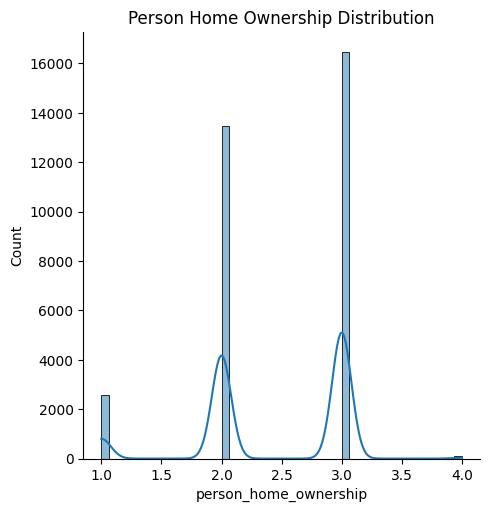

In [23]:
plt.figure(figsize=(6,6))
sn.displot(df_data['person_home_ownership'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Person Home Ownership Distribution')

In [24]:
# Comparing the

## Data Modelling

In [25]:
# Independnet features
X = df_data.drop(['cb_person_default_on_file'], axis=1)
# Dependent feature
y = df_data['cb_person_default_on_file']
#X.head()

In [26]:
from sklearn.model_selection import train_test_split
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=.33, random_state=26)

In [27]:
# features training set
x_train_set.shape

(21829, 11)

In [28]:
x_test_set.shape

(10752, 11)

In [29]:
# convert pandas to numpy data
x_train_set = x_train_set.to_numpy()
x_test_set = x_test_set.to_numpy()

## Feature Scaling

In [30]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_set = scaler.fit_transform(x_train_set)
x_test_set = scaler.fit_transform(x_test_set)

In [31]:
x_test_set

array([[ 0.49477394,  2.92459513, -0.69023168, ..., -0.52814224,
        -0.93946315,  1.00674217],
       [-1.05854578, -0.79173402,  0.88543096, ...,  1.89342933,
         0.28678866, -0.45675215],
       [-0.74788184, -0.79165578,  0.88543096, ..., -0.52814224,
         0.28678866, -0.70066787],
       ...,
       [ 0.65010591, -0.811215  ,  0.88543096, ...,  1.89342933,
         2.64496521,  0.51891073],
       [ 0.02877802,  0.18630499, -0.69023168, ..., -0.52814224,
        -0.37350078,  0.27499501],
       [ 1.58209774, -0.79165578,  0.88543096, ..., -0.52814224,
        -1.22244433,  2.4702365 ]])

## Data Modelling

In [32]:
import torch
from torch import nn
from torch import optim

### Convert data to pytorch tensors

In [33]:
# First convert y series data to ndarray
y_train_set = y_train_set.to_numpy()
y_test_set = y_test_set.to_numpy()

In [34]:
import warnings
warnings.filterwarnings("ignore")


import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len

# sizes of batch data to pass through the trained model at an instant
batch_size = 64

# Instantiate training and test data
train_data = Data(x_train_set, y_train_set)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(x_test_set, y_test_set)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check if it's working
for batch, (train_set, test_set) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {train_set.shape}")
    print(f"y shape: {test_set.shape}")
    break

Batch: 1
X shape: torch.Size([64, 11])
y shape: torch.Size([64])


## Neural Network Implementation

In [35]:
input_dim = 11
hidden_dim = 20
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
        # nn.init.kaiming_uniform_(self.layer_2.weight, nonlinearity="relu")
        # self.layer_3 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))
        # x = torch.nn.functional.sigmoid(self.layer_3(x))

        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=11, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=1, bias=True)
)


## Hyperparameter Definition

In [36]:
learning_rate = 0.1
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Model Training

In [37]:
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

"""
Training Complete
"""

Training Complete


'\nTraining Complete\n'

## Model Prediction and Evaluation

In [38]:
"""
We're not training so we don't need to calculate the gradients for our outputs
"""

import itertools

y_pred = list()
y_test = list()
total = 0
correct = 0
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs <= 0.5, 0, 1)
        predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y)
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the 3300 test instances: {100 * correct / total}%')

Accuracy of the network on the 3300 test instances: 82.58928571428571%


In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns


y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      8836
         1.0       0.51      0.79      0.62      1916

    accuracy                           0.83     10752
   macro avg       0.73      0.81      0.75     10752
weighted avg       0.87      0.83      0.84     10752

